In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1) (4).csv


In [3]:
import pandas as pd
df1 = pd.read_csv('SalaryData_Test(1).csv')
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
uploaded = files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1) (3).csv


In [5]:
df2 = pd.read_csv('SalaryData_Train(1).csv')
df2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df = pd.concat([df1, df2])
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
df.shape

(45221, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [10]:
df[df.duplicated()].shape

(5982, 14)

In [11]:
df.drop_duplicates(inplace=True)

In [16]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000
mean,39.309412,10.136293,1253.346186,101.207727,41.206121
std,13.298159,2.637228,7994.096625,431.309171,12.458178
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [17]:
categorical_features = df.describe(include=["object",'category']).columns
categorical_features

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [18]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek'], dtype='object')

<ipython-input-19-9fd95b79a35a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde= False, label='Skew = %.3f' %(skew), bins=30)


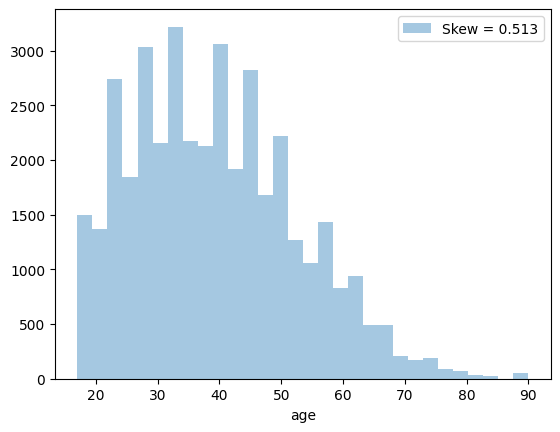

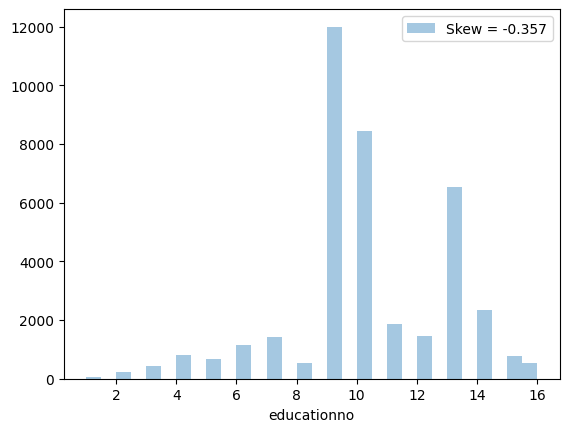

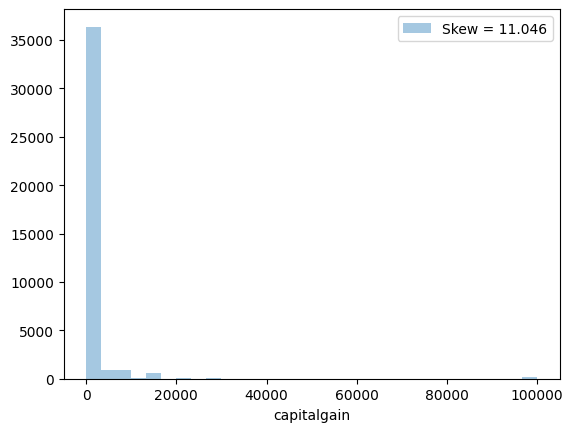

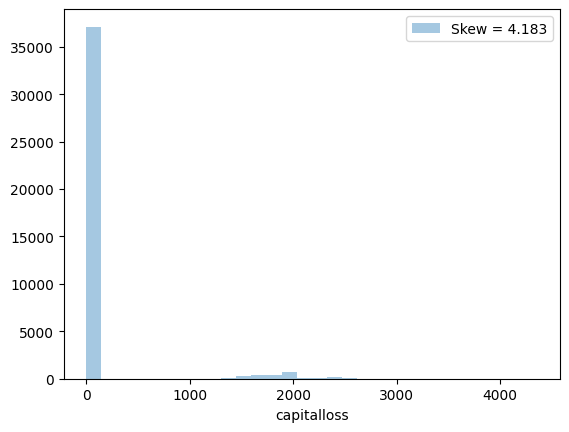

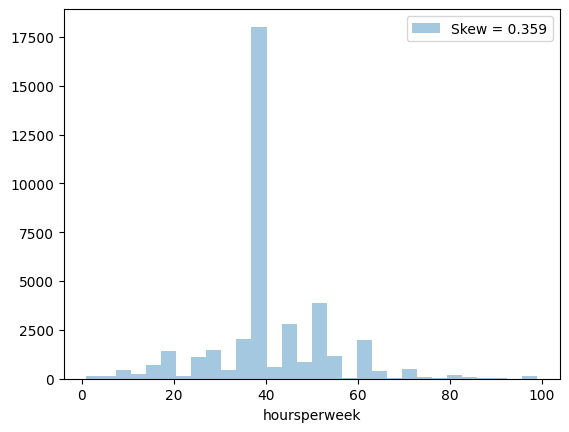

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in numerical_features:
    skew = df[i].skew()
    sns.distplot(df[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [20]:
numerical_features

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek'], dtype='object')

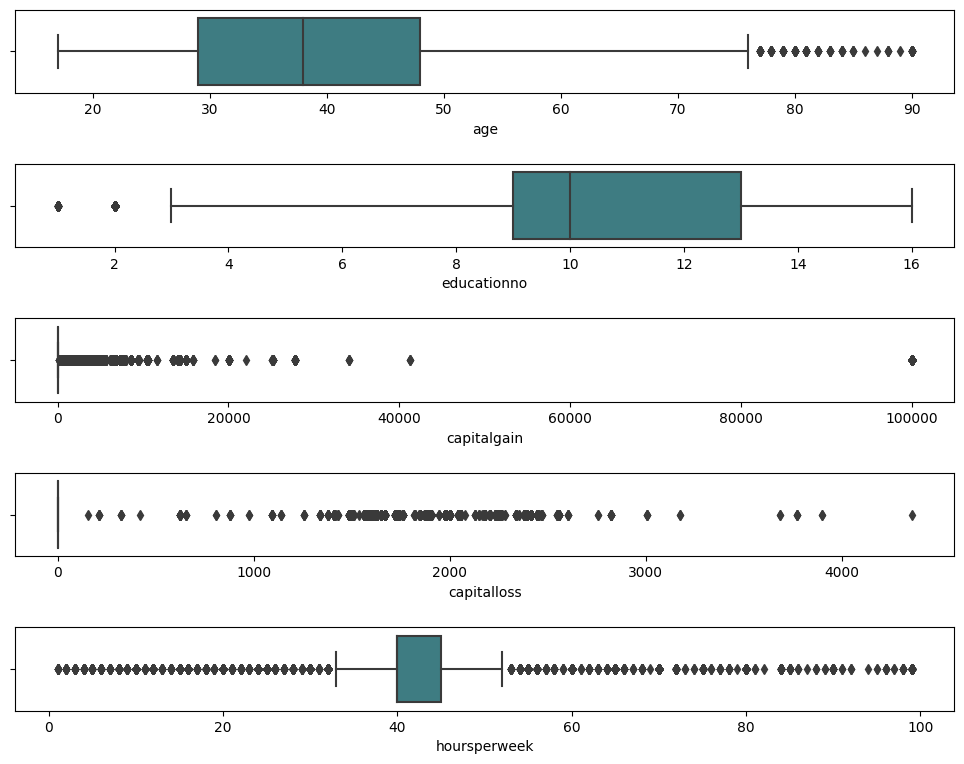

In [21]:
fig, axes = plt.subplots(5,1,figsize=(10,8),sharex=False,sharey=False)
sns.boxplot(x='age', data= df,palette='crest',ax=axes[0])
sns.boxplot(x='educationno',data= df,palette='crest',ax=axes[1])
sns.boxplot(x='capitalgain',data= df,palette='crest',ax=axes[2])
sns.boxplot(x='capitalloss',data= df,palette='crest',ax=axes[3])
sns.boxplot(x='hoursperweek',data= df,palette='crest',ax=axes[4])
plt.tight_layout(pad=2.0)

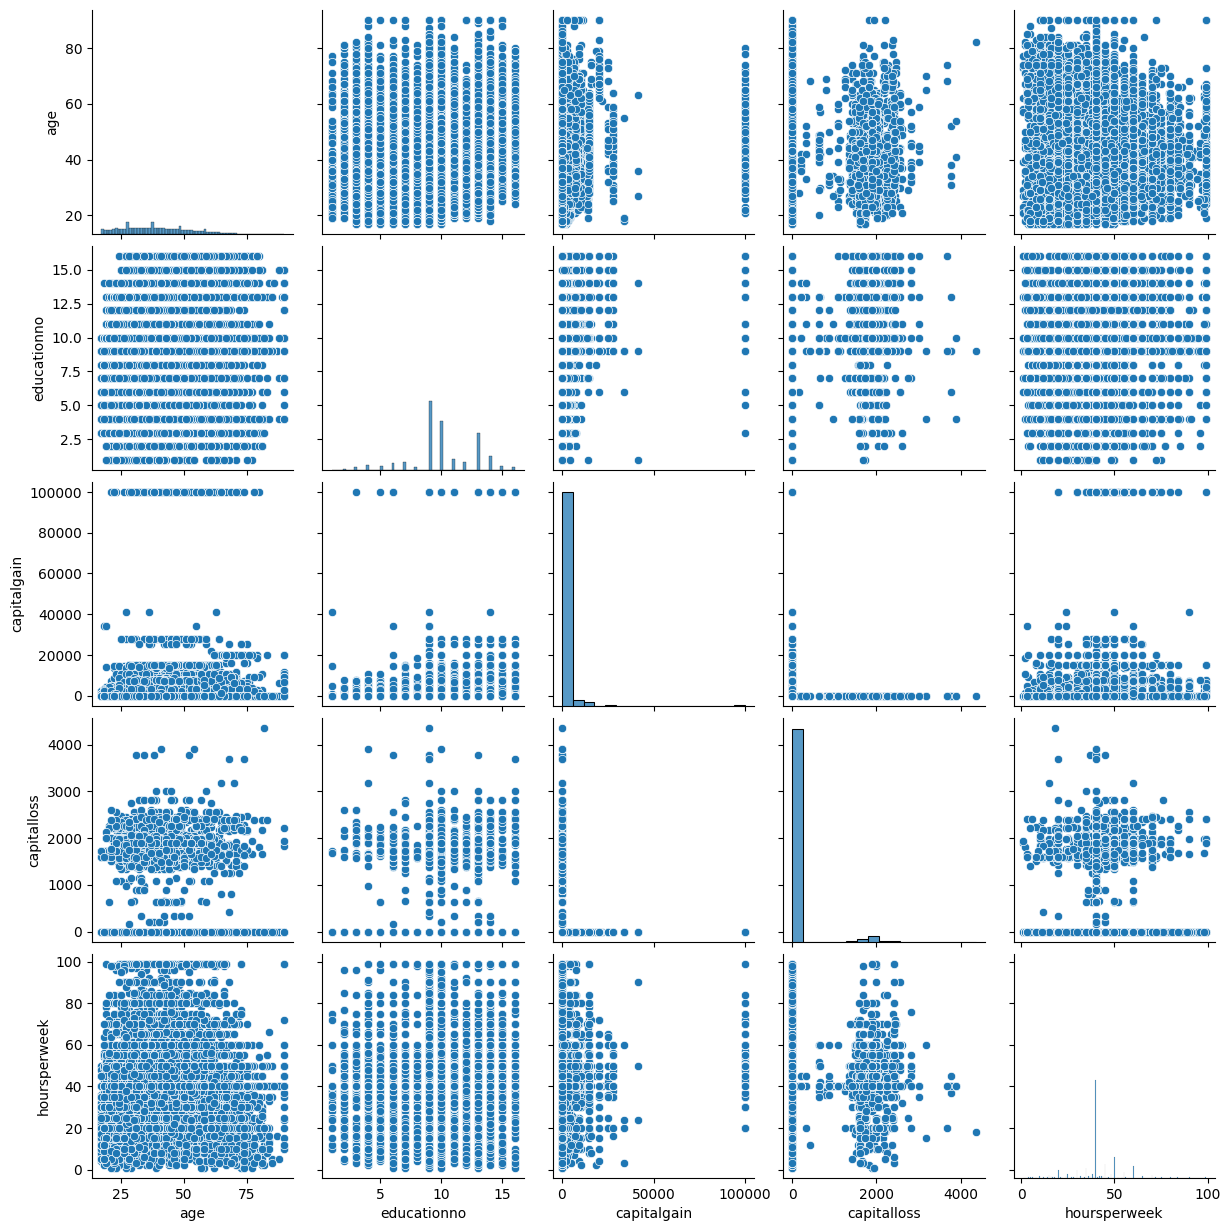

In [22]:
sns.pairplot(df)
plt.show()

<ipython-input-23-3f0a729cc730>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="viridis")


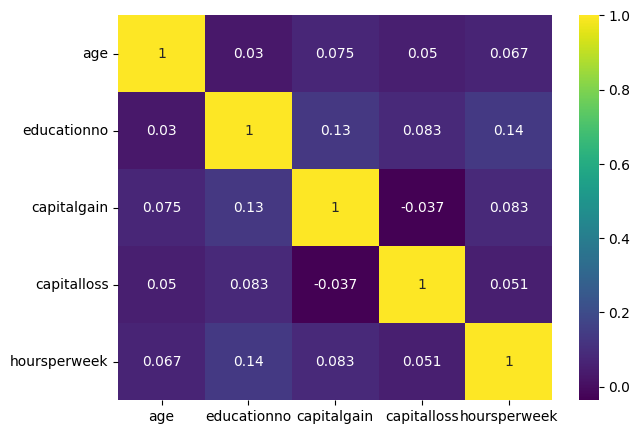

In [23]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

In [24]:
categorical_features

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [25]:
from sklearn import preprocessing
label_enocoder = preprocessing.LabelEncoder()
df['workclass1'] = label_enocoder.fit_transform(df['workclass'])
df['education1'] = label_enocoder.fit_transform(df['education'])
df['maritalstatus1'] = label_enocoder.fit_transform(df['maritalstatus'])
df['occupation1'] = label_enocoder.fit_transform(df['occupation'])
df['relationship1'] = label_enocoder.fit_transform(df['relationship'])
df['race1'] = label_enocoder.fit_transform(df['race'])
df['sex1'] = label_enocoder.fit_transform(df['sex'])
df['native1'] = label_enocoder.fit_transform(df['native'])
df['Salary1'] = label_enocoder.fit_transform(df['Salary'])

In [26]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,...,Salary,workclass1,education1,maritalstatus1,occupation1,relationship1,race1,sex1,native1,Salary1
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,...,<=50K,2,1,4,6,3,2,1,37,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,...,<=50K,2,11,2,4,0,4,1,37,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,...,>50K,1,7,2,10,0,4,1,37,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,...,>50K,2,15,2,6,0,2,1,37,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,...,<=50K,2,0,4,7,1,4,1,37,0


In [27]:
df.drop(columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary'],inplace=True,axis=1)

In [28]:
df.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass1,education1,maritalstatus1,occupation1,relationship1,race1,sex1,native1,Salary1
0,25,7,0,0,40,2,1,4,6,3,2,1,37,0
1,38,9,0,0,50,2,11,2,4,0,4,1,37,0
2,28,12,0,0,40,1,7,2,10,0,4,1,37,1
3,44,10,7688,0,40,2,15,2,6,0,2,1,37,1
4,34,6,0,0,30,2,0,4,7,1,4,1,37,0


In [29]:
df.rename(columns={'workclass1':'workclass','education1':'education','maritalstatus1':'maritalstatus','occupation1':'occupation','relationship1':'relationship','race1':'race','sex1':'sex','native1':'native','Salary1':'Salary'},inplace=True)
df.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,25,7,0,0,40,2,1,4,6,3,2,1,37,0
1,38,9,0,0,50,2,11,2,4,0,4,1,37,0
2,28,12,0,0,40,1,7,2,10,0,4,1,37,1
3,44,10,7688,0,40,2,15,2,6,0,2,1,37,1
4,34,6,0,0,30,2,0,4,7,1,4,1,37,0


In [30]:
df.shape

(39239, 14)

In [31]:
X = df.iloc[:,0:13]
Y = df.iloc[:,13]

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((31391, 13), (7848, 13), (31391,), (7848,))

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf','sigmoid'],'gamma':[100,50,0.2,0.5,0.1,0.001,20],'C':[15,14,13,12,0.1,0.001]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)